# PROBLEM STATEMENT

## 1.Subsidy Inc. delivers subsideies to individual based on thier income.
## 2.Subsidy Inc. has obtain a large data set of authenticated data on individual income, demographic parameters and fer financial parameters.
## 3.Subsidy Inc. wishes us to : Devleop an  income classifier system for individuals.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import os
os.chdir('E:')
#importing data
data_income = pd.read_csv('income.csv')
data = data_income.copy()

In [2]:
# Exploratory data analysis
print(data.info())
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None
age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
h

In [3]:
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [4]:
summary_cat = data.describe(include='O')
print(summary_cat)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [5]:
print(data['JobType'].value_counts())
print(data['occupation'].value_counts())

print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

data = pd.read_csv('income.csv',na_values=[" ?"])

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-

In [6]:
# Date Pre-processing
print(data.isnull().sum())
missing =data[data.isnull().any(axis=1)]

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64


In [7]:
data2 = data.dropna(axis=0)

In [8]:
#relationship between independent variable
correlation = data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [9]:
print(data2.columns)

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')


In [10]:
#gender proportion table using cross table
gender = pd.crosstab(index = data2['gender'], columns = 'count', normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [11]:
#gender vs salary status
gender_salstat = pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True,normalize='index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


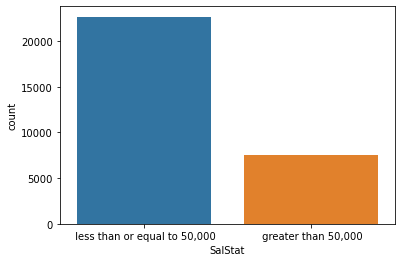

In [12]:

#frequency distribution of salary status (barplot)
SalStat = sns.countplot(data2['SalStat'])

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

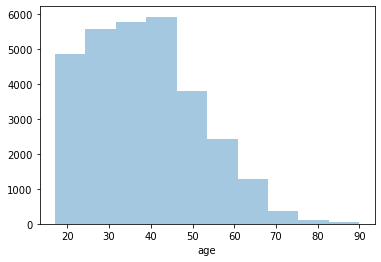

In [13]:
#histogram of age
#kde = false so that frequency is on y axis
sns.distplot(data2['age'],bins=10,kde = False)

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

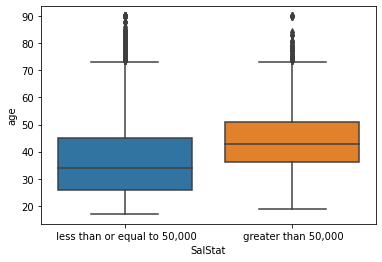

In [14]:
#box plot of age vs salsary status
sns.boxplot('SalStat','age',data=data2)
data2.groupby('SalStat')['age'].median()

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000


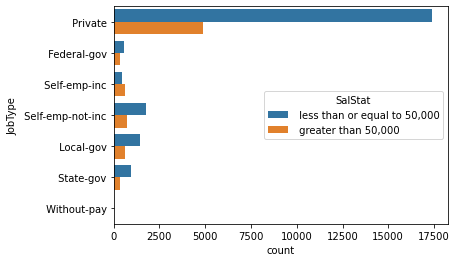

In [16]:
#barplot of job vs salary status
sns.countplot(y='JobType',hue='SalStat',data=data2)
jobtype = pd.crosstab(index=data2['JobType'],columns=data2['SalStat'],normalize='index')
print(jobtype)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

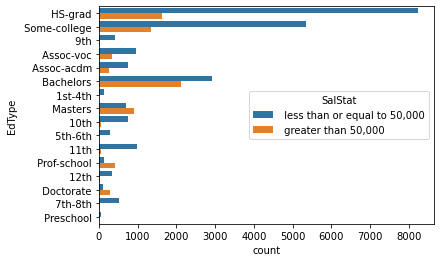

In [17]:
#barplot of EdType vs salary status
sns.countplot(y='EdType',hue='SalStat',data=data2)
edtype = pd.crosstab(index=data2['EdType'],columns=data2['SalStat'],normalize='index')
print(edtype)

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

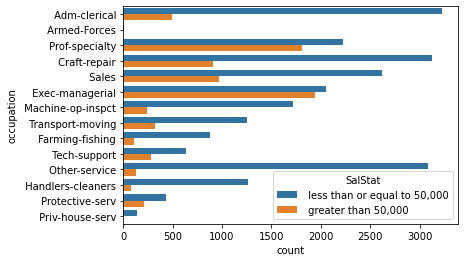

In [18]:

#barplot of occupation vs salary status
sns.countplot(y='occupation',hue='SalStat',data=data2)
occupation = pd.crosstab(index=data2['occupation'],columns=data2['SalStat'],normalize='index')
print(occupation)


C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain'>

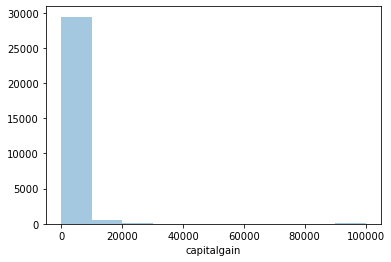

In [19]:
#histogram of capitalgain
sns.distplot(data2['capitalgain'],bins=10,kde=False)

<AxesSubplot:xlabel='capitalloss'>

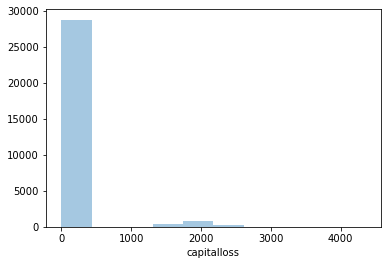

In [20]:
#histogram of capitalloss
sns.distplot(data2['capitalloss'],bins=10,kde=False)

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

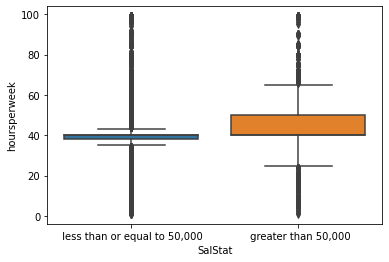

In [21]:
#box plot of hours per week vs salary status
sns.boxplot('SalStat','hoursperweek',data = data2)

LOGISTIC REGRESSION

In [22]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


<ipython-input-22-d383ccebc0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [23]:
new_data=pd.get_dummies(data2,drop_first=True)

In [24]:
#storing the column names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [25]:
#seprating the input names from data
features = list(set(columns_list)-set(['SalStat']))
print(features)

['hoursperweek', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'JobType_ Local-gov', 'capitalgain', 'JobType_ Self-emp-inc', 'nativecountry_ Hong', 'nativecountry_ Guatemala', 'occupation_ Machine-op-inspct', 'JobType_ State-gov', 'occupation_ Exec-managerial', 'occupation_ Transport-moving', 'occupation_ Prof-specialty', 'nativecountry_ Jamaica', 'EdType_ 5th-6th', 'JobType_ Private', 'nativecountry_ Peru', 'relationship_ Not-in-family', 'nativecountry_ Yugoslavia', 'nativecountry_ Puerto-Rico', 'nativecountry_ Trinadad&Tobago', 'EdType_ Preschool', 'age', 'nativecountry_ Japan', 'occupation_ Sales', 'occupation_ Armed-Forces', 'maritalstatus_ Married-civ-spouse', 'capitalloss', 'maritalstatus_ Never-married', 'EdType_ Assoc-acdm', 'nativecountry_ Scotland', 'race_ Other', 'JobType_ Without-pay', 'EdType_ HS-grad', 'nativecountry_ Portugal', 'nativecountry_ Iran', 'nativecountry_ El-Salvador', 'nativecountry_ United-States', 'EdType_ 12th', 'EdType_ Bachelors', 'EdType_ 7th-8th', 'rela

In [26]:
#storing the output values in y
y = new_data['SalStat'].values 
#dependent variables
print(y)

[0 0 1 ... 0 0 0]


In [27]:
#storing the input values from inout features
x = new_data[features].values #independent variables
print(x)

[[28  0  0 ...  0  0  0]
 [40  0  0 ...  0  0  0]
 [40  0  0 ...  0  0  0]
 ...
 [40  0  0 ...  0  0  0]
 [40  0  1 ...  0  0  0]
 [40  0  0 ...  0  0  0]]


In [28]:
#splitting the data to train and test 
train_x,test_x,train_y,test_y = train_test_split(x, y,test_size=0.3,random_state=0)

In [29]:
#make an instance of the model
logistic = LogisticRegression()

In [30]:
#fitting the value of x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

C:\Users\Shreya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.04081163])

In [31]:
#prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [32]:
#confusion matrix
confusion_matrix = confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[6292  531]
 [ 947 1279]]


In [33]:
#calculating the acuuracy
accuracy_score = accuracy_score(test_y,prediction)
print(accuracy_score)

0.8366670350314952
